**DOWNLOAD THE DATASET AND UNZIP IT**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

**IMAGE AUGMENTATION**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
xtrain = train_datagen.flow_from_directory('/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


**CREATE MODEL**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

**ADD LAYERS**

In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Dense layers
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(5,activation='softmax')) # Output layer

**COMPILE THE MODEL**

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**FIT THE MODEL**

In [10]:
model.fit(xtrain,
          steps_per_epoch=len(xtrain),
          epochs=10,
          )

Epoch 1/10
44/44 [==============================] - 27s 591ms/step - loss: 1.5896 - accuracy: 0.3861
Epoch 2/10
44/44 [==============================] - 27s 607ms/step - loss: 1.0904 - accuracy: 0.5569
Epoch 3/10
44/44 [==============================] - 26s 594ms/step - loss: 1.0190 - accuracy: 0.5953
Epoch 4/10
44/44 [==============================] - 26s 588ms/step - loss: 0.9542 - accuracy: 0.6322
Epoch 5/10
44/44 [==============================] - 27s 599ms/step - loss: 0.8612 - accuracy: 0.6678
Epoch 6/10
44/44 [==============================] - 27s 600ms/step - loss: 0.8132 - accuracy: 0.6820
Epoch 7/10
44/44 [==============================] - 27s 607ms/step - loss: 0.7731 - accuracy: 0.7067
Epoch 8/10
44/44 [==============================] - 26s 592ms/step - loss: 0.7491 - accuracy: 0.7153
Epoch 9/10
44/44 [==============================] - 26s 589ms/step - loss: 0.7097 - accuracy: 0.7281
Epoch 10/10
44/44 [==============================] - 26s 591ms/step - loss: 0.6876 - accura

**SAVE THE MODEL**

In [11]:
model.save('flowers.h5')

**TESTING THE MODEL**

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

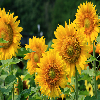

In [25]:
img = image.load_img('/content/flowers/sunflower/1008566138_6927679c8a.jpg',target_size=(100,100))
img

In [ ]:
x = image.img_to_array(img)
x
x = np.expand_dims(x,axis=0)
x
model.predict(x)

In [15]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [16]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'sunflower'

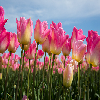

In [26]:
from numpy.lib.type_check import imag
img = image.load_img('/content/flowers/tulip/10128546863_8de70c610d.jpg',target_size=(100,100))
img

In [18]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'tulip'

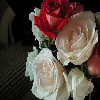

In [27]:
img = image.load_img('/content/flowers/rose/102501987_3cdb8e5394_n.jpg',target_size=(100,100))
img

In [20]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'rose'

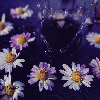

In [28]:
img = image.load_img('/content/flowers/daisy/10172567486_2748826a8b.jpg',target_size=(100,100))
img

In [22]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'rose'

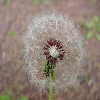

In [29]:
img = image.load_img('/content/flowers/dandelion/11405573_24a8a838cc_n.jpg',target_size=(100,100))
img

In [24]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'dandelion'